In [24]:
import warnings
import scipy as sp
import numpy as np
import porespy as ps
import openpnm as op
import matplotlib.pyplot as plt
import scipy.io as sio
import seaborn as sns
import math

imageSize = 250

primaryImage = np.load('subBeadPackPy250_justSpheres.npy')
secondaryImage = np.load('finalSimFile3D250.npy')

resolution = 16.81E-6 # adding resolution in meters

# Plot the pore image

Plot the pore image of the sample before and after adding a secondary porosity

Text(0.5, 1.0, 'Added secondary porosity')

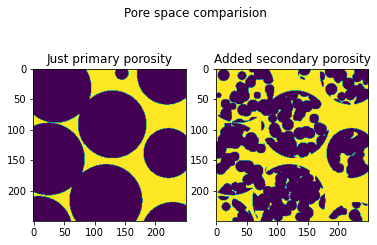

In [17]:
slice = 49

secondaryImage = np.transpose(secondaryImage)
primaryImage = np.transpose(primaryImage)


fig, (p1, p2) = plt.subplots(1, 2)

fig.suptitle('Pore space comparision')

p1.imshow(primaryImage[:,:,slice])
p1.set_title('Just primary porosity')

p2.imshow(secondaryImage[:,:,slice])
p2.set_title('Added secondary porosity')

# Extract pore information

Extract the pore info via snow algorithm (https://journals.aps.org/pre/abstract/10.1103/PhysRevE.96.023307)

In [18]:
snowFiltSecondary = ps.filters.snow_partitioning(im=secondaryImage, return_all=True)
poreInfoSecondary = ps.networks.regions_to_network(snowFiltSecondary.regions, dt=snowFiltSecondary.dt)

------------------------------------------------------------
Beginning SNOW Algorithm
Converting supplied image (im) to boolean
Peforming Distance Transform
Applying Gaussian blur with sigma = 0.4
Initial number of peaks:  1436
Peaks after trimming saddle points:  938
Peaks after trimming nearby peaks:  922
------------------------------------------------------------
Extracting pore and throat information from image
100%|████████████████████████████████████████████████████████████████████████████████| 922/922 [00:09<00:00, 98.31it/s]


In [19]:
snowFiltPrimary = ps.filters.snow_partitioning(im=primaryImage, return_all=True)
poreInfoPrimary = ps.networks.regions_to_network(snowFiltPrimary.regions, dt=snowFiltPrimary.dt)

------------------------------------------------------------
Beginning SNOW Algorithm
Converting supplied image (im) to boolean
Peforming Distance Transform
Applying Gaussian blur with sigma = 0.4
Initial number of peaks:  113
Peaks after trimming saddle points:  104
Peaks after trimming nearby peaks:  93
------------------------------------------------------------
Extracting pore and throat information from image
100%|██████████████████████████████████████████████████████████████████████████████████| 93/93 [00:04<00:00, 18.79it/s]


# Extract pore diameter from network

In [20]:
nRegions = np.unique(snowFiltSecondary.regions).size
secondaryPoreDiamVecSecondary = np.zeros(nRegions,)

for a in range(0, poreInfoSecondary['pore.diameter'].size):
    secondaryPoreDiamVecSecondary[a] = poreInfoSecondary['pore.diameter'][a]

In [21]:
nRegions = np.unique(snowFiltPrimary.regions).size
primaryPoreDiamVec = np.zeros(nRegions,)

for a in range(0, poreInfoPrimary['pore.diameter'].size):
    primaryPoreDiamVec[a] = poreInfoPrimary['pore.diameter'][a]

# Bin extracted pore diameter data for plotting

In [22]:
# Bin pore diameter data
#max(poreInfo['pore.diameter'])
#min(poreInfo['pore.diameter'])
n_bins = 100

primaryPoreBins = np.linspace(0.1,60,n_bins)
primaryPoreDiamVec = poreInfoPrimary['pore.diameter']
primaryBinnedInd = np.digitize(primaryPoreDiamVec, primaryPoreBins)

allKeys = np.round(primaryPoreBins,2)
primaryBinnedPoreDiam = dict.fromkeys(allKeys)

for i in primaryBinnedPoreDiam.keys():
    primaryBinnedPoreDiam[i] = []

# currently storing all of the diameters of a pore for a binned pore size
for i in range(1, len(primaryBinnedInd)):
    key=primaryPoreBins[primaryBinnedInd[i]]
    key = round(key,2)
    primaryBinnedPoreDiam[key].append(primaryPoreDiamVec[i])
    #binnedPoreDiam[key].append(poreDispVector[i])

#regionLabel[i].append
secondaryPoreBins = np.linspace(0.1,60,n_bins)
secondaryPoreDiamVec = poreInfoSecondary['pore.diameter']
secondaryBinnedInd = np.digitize(secondaryPoreDiamVec, secondaryPoreBins)

allKeys = np.round(secondaryPoreBins,2)
secondaryBinnedPoreDiam = dict.fromkeys(allKeys)

for i in secondaryBinnedPoreDiam.keys():
    secondaryBinnedPoreDiam[i] = []

# currently storing all of the diameters of a pore for a binned pore size
for i in range(1, len(secondaryBinnedInd)):
    key=secondaryPoreBins[secondaryBinnedInd[i]]
    key = round(key,2)
    secondaryBinnedPoreDiam[key].append(secondaryPoreDiamVec[i])
    #binnedPoreDiam[key].append(poreDispVector[i])
#regionLabel[i].append

# Plot distribution of pore diameter

Text(0.5, 0, 'Pore Diameter (Lattice units)')

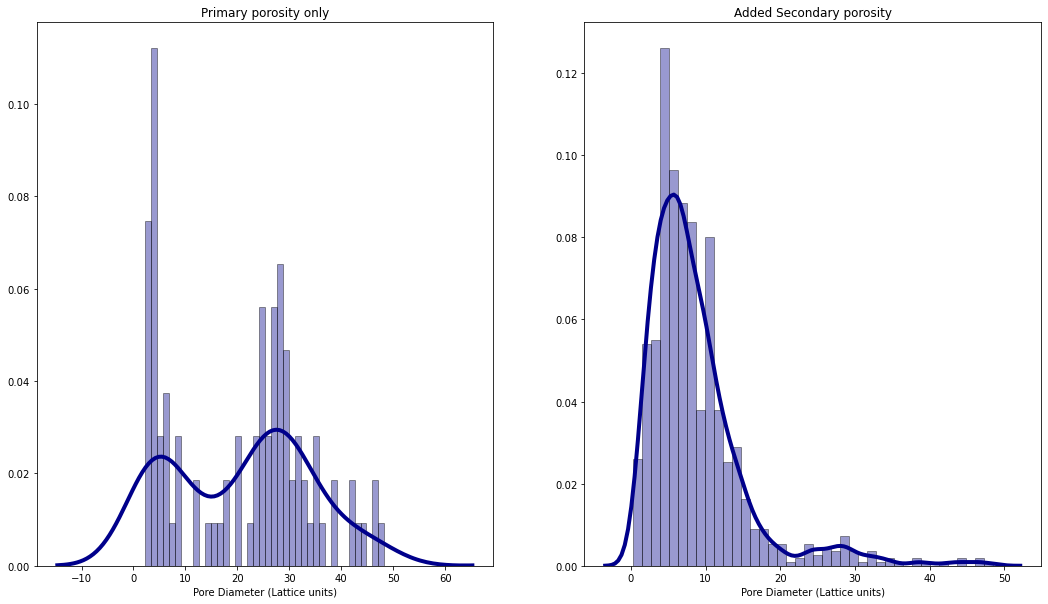

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))
sns.distplot(primaryPoreDiamVec, ax=axes[0], hist=True, kde=True,
             bins=int(40), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
axes[0].set_title('Primary porosity only')
axes[0].set_xlabel('Pore Diameter (Lattice units)')

sns.distplot(secondaryPoreDiamVec, ax=axes[1], hist=True, kde=True,
             bins=int(40), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
axes[1].set_title('Added Secondary porosity')
axes[1].set_xlabel('Pore Diameter (Lattice units)')

